In [1]:
import os
import pandas as pd

# Define the directory containing the TSV files
directory = "/Users/yonathanciotta/Desktop/Immigration/02 Data/Original Data/crime and criminal justice ODEC"

# Get a list of all files in the directory
all_files = os.listdir(directory)

# Filter the list to include only TSV files
tsv_files = [f for f in all_files if f.endswith('.tsv')]

# Loop through each TSV file and convert it to CSV
for tsv_file in tsv_files:
    # Define the full path for the TSV file
    tsv_path = os.path.join(directory, tsv_file)
    
    # Read the TSV file into a DataFrame
    df = pd.read_csv(tsv_path, sep='\t', low_memory=False)
    
    # Define the CSV file name and path
    csv_file = tsv_file.replace('.tsv', '.csv')
    csv_path = os.path.join(directory, csv_file)
    
    # Save the DataFrame as a CSV file
    df.to_csv(csv_path, index=False)
    
    print(f"Converted {tsv_file} to {csv_file}")

print("All TSV files have been converted to CSV format.")


Converted estat_crim_crt_case22 2.tsv to estat_crim_crt_case22 2.csv
Converted estat_crim_crt_per.tsv to estat_crim_crt_per.csv
Converted estat_crim_hom_soff.tsv to estat_crim_hom_soff.csv
Converted estat_crim_pris_cap.tsv to estat_crim_pris_cap.csv
Converted estat_crim_crt_case22 3.tsv to estat_crim_crt_case22 3.csv
Converted estat_crim_plce.tsv to estat_crim_plce.csv
Converted estat_crim_pris_pop.tsv to estat_crim_pris_pop.csv
Converted estat_crim_crt_case22.tsv to estat_crim_crt_case22.csv
Converted estat_crim_hom_vage.tsv to estat_crim_hom_vage.csv
Converted estat_crim_pris_tri.tsv to estat_crim_pris_tri.csv
Converted estat_crim_hom_ocit.tsv to estat_crim_hom_ocit.csv
Converted estat_crim_just_ctz.tsv to estat_crim_just_ctz.csv
Converted estat_crim_just_sex.tsv to estat_crim_just_sex.csv
Converted estat_crim_thb_vctz.tsv to estat_crim_thb_vctz.csv
Converted estat_crim_just_bri.tsv to estat_crim_just_bri.csv
Converted estat_crim_smu_sex.tsv to estat_crim_smu_sex.csv
Converted estat_

In [3]:
# Specify the directory where the CSV files are located
directory = "/Users/yonathanciotta/Desktop/Immigration/02 Data/Original Data/crime and criminal justice ODEC"

# Dictionary to hold dataframes
dataframes = {}

# Loop through the directory and load each CSV file into a dataframe
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        try:
            # Load the CSV file into a dataframe
            df = pd.read_csv(filepath, delimiter=',')
            # Store the dataframe in the dictionary with the filename as key
            dataframes[filename] = df
            print(f"Loaded {filename} successfully.")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Display the loaded dataframes
print(f"Loaded {len(dataframes)} CSV files.")



Loaded estat_crim_just_job.csv successfully.
Loaded estat_crim_hom_vrel.csv successfully.
Loaded estat_crim_crt_case.csv successfully.
Loaded estat_crim_hist.csv successfully.
Loaded estat_crim_hom_city.csv successfully.
Loaded estat_crim_pris_ctz.csv successfully.
Loaded estat_crim_just_age.csv successfully.
Loaded estat_crim_hom_vcit.csv successfully.
Loaded estat_crim_crt_per 2.csv successfully.
Loaded estat_crim_thb_vexp.csv successfully.
Loaded estat_crim_thb_sex.csv successfully.
Loaded estat_crim_smu_sctz.csv successfully.
Loaded estat_crim_pris_off.csv successfully.
Loaded estat_crim_off_cat.csv successfully.
Loaded estat_crim_gen_reg.csv successfully.
Loaded estat_crim_smu_sex.csv successfully.
Loaded estat_crim_gen.csv successfully.
Loaded estat_crim_just_bri.csv successfully.
Loaded estat_crim_just_sex.csv successfully.
Loaded estat_crim_just_ctz.csv successfully.
Loaded estat_crim_thb_vctz.csv successfully.
Loaded estat_crim_pris_tri.csv successfully.
Loaded estat_crim_hom_

In [4]:
for filename, df in dataframes.items():
    print(f"Preview of {filename}:")
    print(df.head())
    print("\n")


Preview of estat_crim_just_job.csv:
  freq,isco08,sex,unit,geo\TIME_PERIOD 2008  2009   2010   2011   2012   \
0                    A,OC2612A,F,NR,AL    :     :      :      :      :    
1                    A,OC2612A,F,NR,AT  151   156    158    162    168    
2                    A,OC2612A,F,NR,BA  548   545    593    684    698    
3                    A,OC2612A,F,NR,BE    :     :   1128   1139   1188    
4                    A,OC2612A,F,NR,BG    :     :      :      :      :    

   2013   2014   2015   2016   2017   2018   2019   2020   2021   2022   
0   153    157    163      :    179    171    168    168    170      :   
1   179    196    199    200    198    199    213    212    216    213   
2   698    699    661    698    707    704    705    706    761    688   
3  1197   1266   1267      :    841    852    868    855      :      :   
4     :      :   1490   1502   1500   1477   1466   1452   1450   1446   


Preview of estat_crim_hom_vrel.csv:
  freq,pers_cat,sex,unit,geo\TI

In [5]:
import pandas as pd
import numpy as np
import os

# Directory containing the CSV files
directory = "/Users/yonathanciotta/Desktop/Immigration/02 Data/Original Data/crime and criminal justice ODEC"

# Function to standardize column names and structure
def standardize_dataframe(df, filename):
    # Convert column names to lowercase and replace spaces with underscores
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    # Standardize missing values
    df.replace({':': np.nan, ' ': np.nan, '': np.nan}, inplace=True)
    
    # Extract the year columns
    year_columns = [col for col in df.columns if col.isdigit()]
    
    # Melt the dataframe to long format
    if 'geo' in df.columns:
        df = pd.melt(df, id_vars=['geo'], value_vars=year_columns, var_name='year', value_name=filename)
    elif 'geo\time_period' in df.columns:
        # If the column name has extra characters, standardize it
        df.rename(columns={'geo\time_period': 'geo'}, inplace=True)
        df = pd.melt(df, id_vars=['geo'], value_vars=year_columns, var_name='year', value_name=filename)
    else:
        # Handle case where 'geo' column is missing
        print(f"Warning: 'geo' column missing in {filename}. Skipping this file.")
        return None
    
    return df

# Dictionary to hold standardized dataframes
standardized_dfs = {}

# Loop through the directory and standardize each CSV file
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        try:
            # Load the CSV file into a dataframe
            df = pd.read_csv(filepath, delimiter=',')
            
            # Standardize the dataframe
            standardized_df = standardize_dataframe(df, filename)
            
            if standardized_df is not None:
                # Store the standardized dataframe in the dictionary
                standardized_dfs[filename] = standardized_df
                print(f"Standardized {filename} successfully.")
        except Exception as e:
            print(f"Error standardizing {filename}: {e}")

# Merge all dataframes on 'geo' and 'year' columns
merged_df = None
for filename, df in standardized_dfs.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on=['geo', 'year'], how='outer')

# Display the merged dataframe
print("Merged Dataframe:")
print(merged_df.head())

# Save the merged dataframe
merged_df.to_csv(os.path.join(directory, "merged_crime_data.csv"), index=False)
print("Merged dataframe saved as 'merged_crime_data.csv'.")


Merged Dataframe:


AttributeError: 'NoneType' object has no attribute 'head'

In [6]:
import pandas as pd
import os

# Directory containing the CSV files
directory = "/Users/yonathanciotta/Desktop/Immigration/02 Data/Original Data/crime and criminal justice ODEC"

# Function to read and preview the structure of each CSV file
def preview_file_structure(filepath):
    df = pd.read_csv(filepath, delimiter=',')
    print(f"Preview of {os.path.basename(filepath)}:")
    print(df.head())
    print("\nColumns:", df.columns)
    print("Number of columns:", len(df.columns))
    print("-" * 80)
    return df.columns

# Dictionary to store column structures of each file
file_structures = {}

# Loop through the directory and analyze each CSV file
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        try:
            # Preview and capture the column structure
            columns = preview_file_structure(filepath)
            file_structures[filename] = columns
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Identify groups of files with similar column structures
# For demonstration, we will group them manually after reviewing the structures
# We will then attempt to merge files within these groups
group_1 = ['estat_crim_just_age.csv', 'estat_crim_just_bri.csv', 'estat_crim_just_ctz.csv']  # Example group
group_2 = ['estat_crim_hom_vage.csv', 'estat_crim_hom_vcit.csv']  # Example group
# Add more groups based on similarity in columns and structure

# Function to merge files within a group based on a common column like 'year'
def merge_files_within_group(group, directory, common_columns):
    merged_df = None
    for filename in group:
        filepath = os.path.join(directory, filename)
        try:
            df = pd.read_csv(filepath, delimiter=',')
            df = df[common_columns]
            if merged_df is None:
                merged_df = df
            else:
                merged_df = pd.merge(merged_df, df, on=common_columns, how='outer')
            print(f"Merged {filename} into group dataframe.")
        except Exception as e:
            print(f"Error merging {filename}: {e}")
    return merged_df

# Example merge for group 1
common_columns_group_1 = ['year', 'leg_stat', 'unit', 'geo']  # Example common columns
merged_group_1_df = merge_files_within_group(group_1, directory, common_columns_group_1)

# If merged successfully, analyze the merged dataframe
if merged_group_1_df is not None:
    print("Merged Group 1 Dataframe:")
    print(merged_group_1_df.head())

# Repeat for other groups
# merged_group_2_df = merge_files_within_group(group_2, directory, common_columns_group_2)
# ...

# After merging all groups, combine the resulting dataframes if possible
# Final merged dataframe:
# final_merged_df = pd.merge(merged_group_1_df, merged_group_2_df, on=common_column, how='outer')


Preview of estat_crim_just_job.csv:
  freq,isco08,sex,unit,geo\TIME_PERIOD 2008  2009   2010   2011   2012   \
0                    A,OC2612A,F,NR,AL    :     :      :      :      :    
1                    A,OC2612A,F,NR,AT  151   156    158    162    168    
2                    A,OC2612A,F,NR,BA  548   545    593    684    698    
3                    A,OC2612A,F,NR,BE    :     :   1128   1139   1188    
4                    A,OC2612A,F,NR,BG    :     :      :      :      :    

   2013   2014   2015   2016   2017   2018   2019   2020   2021   2022   
0   153    157    163      :    179    171    168    168    170      :   
1   179    196    199    200    198    199    213    212    216    213   
2   698    699    661    698    707    704    705    706    761    688   
3  1197   1266   1267      :    841    852    868    855      :      :   
4     :      :   1490   1502   1500   1477   1466   1452   1450   1446   

Columns: Index(['freq,isco08,sex,unit,geo\TIME_PERIOD', '2008 ', '20

In [7]:
# Example merge for group 1
common_columns_group_1 = ['year', 'leg_stat', 'unit', 'geo']  # Example common columns
merged_group_1_df = merge_files_within_group(group_1, directory, common_columns_group_1)

# If merged successfully, analyze the merged dataframe
if merged_group_1_df is not None:
    print("Merged Group 1 Dataframe:")
    print(merged_group_1_df.head())

# Uncomment and modify the below lines to merge other groups similarly

# Example merge for group 2 (enable and adjust as needed)
# common_columns_group_2 = ['year', 'crime_type', 'geo']  # Example common columns
# merged_group_2_df = merge_files_within_group(group_2, directory, common_columns_group_2)

# After merging all groups, combine the resulting dataframes if possible

# Assuming 'geo' and 'year' are common columns among all merged groups
# if merged_group_1_df is not None and merged_group_2_df is not None:
#     final_merged_df = pd.merge(merged_group_1_df, merged_group_2_df, on=['year', 'geo'], how='outer')
#     print("Final Merged Dataframe:")
#     print(final_merged_df.head())


Error merging estat_crim_just_age.csv: "None of [Index(['year', 'leg_stat', 'unit', 'geo'], dtype='object')] are in the [columns]"
Error merging estat_crim_just_bri.csv: "None of [Index(['year', 'leg_stat', 'unit', 'geo'], dtype='object')] are in the [columns]"
Error merging estat_crim_just_ctz.csv: "None of [Index(['year', 'leg_stat', 'unit', 'geo'], dtype='object')] are in the [columns]"


In [8]:
for file in group_1:  # Adjust this loop for other groups if necessary
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    print(f"Columns in {file}: {df.columns.tolist()}")


Columns in estat_crim_just_age.csv: ['freq,leg_stat,age,unit,geo\\TIME_PERIOD', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']
Columns in estat_crim_just_bri.csv: ['freq,leg_stat,sex,unit,geo\\TIME_PERIOD', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']
Columns in estat_crim_just_ctz.csv: ['freq,leg_stat,citizen,unit,geo\\TIME_PERIOD', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']


In [9]:
for file in group_1:  # Adjust this loop for other groups if necessary
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    print(f"Columns in {file}: {df.columns.tolist()}")


Columns in estat_crim_just_age.csv: ['freq,leg_stat,age,unit,geo\\TIME_PERIOD', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']
Columns in estat_crim_just_bri.csv: ['freq,leg_stat,sex,unit,geo\\TIME_PERIOD', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']
Columns in estat_crim_just_ctz.csv: ['freq,leg_stat,citizen,unit,geo\\TIME_PERIOD', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']


In [10]:
df[['geo', 'TIME_PERIOD']] = df['geo\\TIME_PERIOD'].str.split('\\', expand=True)


KeyError: 'geo\\TIME_PERIOD'

In [11]:
# Use raw string to reference the column with a backslash
df[['geo', 'TIME_PERIOD']] = df[r'geo\\TIME_PERIOD'].str.split('\\', expand=True)

# Or you can use double backslashes
df[['geo', 'TIME_PERIOD']] = df['geo\\\\TIME_PERIOD'].str.split('\\', expand=True)


KeyError: 'geo\\\\TIME_PERIOD'

In [12]:
# Mostra l'elenco delle colonne
print(df.columns)


Index(['freq,leg_stat,citizen,unit,geo\TIME_PERIOD', '2008 ', '2009 ', '2010 ',
       '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ',
       '2019 ', '2020 ', '2021 ', '2022 '],
      dtype='object')


In [13]:
df[['geo', 'TIME_PERIOD']] = df[r'geo\\TIME_PERIOD'].str.split('\\', expand=True)


KeyError: 'geo\\\\TIME_PERIOD'

In [14]:
print(df.columns.tolist())


['freq,leg_stat,citizen,unit,geo\\TIME_PERIOD', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']


In [15]:
# Se il nome della colonna è 'geo\TIME_PERIOD ' con uno spazio alla fine
df[['geo', 'TIME_PERIOD']] = df['geo\\TIME_PERIOD '].str.split('\\', expand=True)


KeyError: 'geo\\TIME_PERIOD '

In [16]:
# Rimuove gli spazi dai nomi delle colonne
df.columns = df.columns.str.strip()


In [17]:
# Trova l'indice della colonna che vuoi separare
index_col = df.columns.get_loc('geo\\TIME_PERIOD')

# Utilizza l'indice per accedere alla colonna e separarla
df[['geo', 'TIME_PERIOD']] = df.iloc[:, index_col].str.split('\\', expand=True)


KeyError: 'geo\\TIME_PERIOD'

In [19]:
# Trova l'indice della colonna
index_col = df.columns.get_loc('freq,leg_stat,citizen,unit,geo\\TIME_PERIOD')

# Utilizza l'indice per accedere alla colonna e separarla
df[['geo', 'TIME_PERIOD']] = df.iloc[:, index_col].str.split('\\', expand=True)



ValueError: Columns must be same length as key

In [20]:
# Dividi la colonna e visualizza i risultati
split_columns = df['freq,leg_stat,citizen,unit,geo\\TIME_PERIOD'].str.split('\\', expand=True)
print(split_columns.head())  # Visualizza le prime righe per verificare

# Verifica il numero di colonne generate
num_columns = split_columns.shape[1]
print(f"Numero di colonne generate: {num_columns}")

# Se sono presenti 5 colonne, assegna i nomi corretti
if num_columns == 5:
    df[['freq', 'leg_stat', 'citizen', 'unit', 'geo_TIME_PERIOD']] = split_columns
else:
    print("Il numero di colonne generate non corrisponde a quello atteso.")


                     0
0  A,PER_CNV,FOR,NR,AT
1  A,PER_CNV,FOR,NR,BA
2  A,PER_CNV,FOR,NR,BE
3  A,PER_CNV,FOR,NR,BG
4  A,PER_CNV,FOR,NR,CH
Numero di colonne generate: 1
Il numero di colonne generate non corrisponde a quello atteso.


In [21]:
# Rimuovi spazi aggiuntivi o caratteri speciali
df['freq,leg_stat,citizen,unit,geo\\TIME_PERIOD'] = df['freq,leg_stat,citizen,unit,geo\\TIME_PERIOD'].str.strip()


In [22]:
# Dividi la colonna usando la virgola come delimitatore
split_columns = df['freq,leg_stat,citizen,unit,geo\\TIME_PERIOD'].str.split(',', expand=True)
print(split_columns.head())  # Visualizza le prime righe per verificare

# Verifica il numero di colonne generate
num_columns = split_columns.shape[1]
print(f"Numero di colonne generate: {num_columns}")

# Se sono presenti 5 colonne, assegna i nomi corretti
if num_columns == 5:
    df[['freq', 'leg_stat', 'citizen', 'unit', 'geo']] = split_columns
else:
    print("Il numero di colonne generate non corrisponde a quello atteso.")


   0        1    2   3   4
0  A  PER_CNV  FOR  NR  AT
1  A  PER_CNV  FOR  NR  BA
2  A  PER_CNV  FOR  NR  BE
3  A  PER_CNV  FOR  NR  BG
4  A  PER_CNV  FOR  NR  CH
Numero di colonne generate: 5


In [23]:
# Assegna le colonne generate al DataFrame originale
df[['freq', 'leg_stat', 'citizen', 'unit', 'geo']] = split_columns

# Visualizza le prime righe del DataFrame aggiornato per confermare che le colonne siano state aggiunte correttamente
print(df.head())


  freq,leg_stat,citizen,unit,geo\TIME_PERIOD    2008    2009    2010    2011  \
0                        A,PER_CNV,FOR,NR,AT  10991   11309   12062   11625    
1                        A,PER_CNV,FOR,NR,BA      :       :       :      39    
2                        A,PER_CNV,FOR,NR,BE      :       :   21553   23541    
3                        A,PER_CNV,FOR,NR,BG    903    1024    2286    1579    
4                        A,PER_CNV,FOR,NR,CH  48519   50817   53598   53143    

     2012    2013    2014    2015    2016  ...    2018    2019    2020  \
0  11795   12107   12210   12857   12520   ...  12033   11665    9665    
1     43      41       :       :       :   ...      :       :       :    
2  28623   28530   24628   28355       :   ...  51534   45414   35396    
3   1931    3464    4851    3271    2281   ...   1211    1177    1011    
4  58875   60829   61374   61178   61496   ...  60499   53502   53502    

     2021    2022 freq leg_stat citizen unit geo  
0   9795   10414     A 

In [24]:
# Riordina le colonne mettendo le nuove colonne all'inizio
col_order = ['freq', 'leg_stat', 'citizen', 'unit', 'geo'] + df.columns[:-5].tolist()
df = df[col_order]

# Visualizza il DataFrame con le colonne riordinate
print(df.head())


  freq leg_stat citizen unit geo freq,leg_stat,citizen,unit,geo\TIME_PERIOD  \
0    A  PER_CNV     FOR   NR  AT                        A,PER_CNV,FOR,NR,AT   
1    A  PER_CNV     FOR   NR  BA                        A,PER_CNV,FOR,NR,BA   
2    A  PER_CNV     FOR   NR  BE                        A,PER_CNV,FOR,NR,BE   
3    A  PER_CNV     FOR   NR  BG                        A,PER_CNV,FOR,NR,BG   
4    A  PER_CNV     FOR   NR  CH                        A,PER_CNV,FOR,NR,CH   

     2008    2009    2010    2011  ...    2013    2014    2015    2016  \
0  10991   11309   12062   11625   ...  12107   12210   12857   12520    
1      :       :       :      39   ...     41       :       :       :    
2      :       :   21553   23541   ...  28530   24628   28355       :    
3    903    1024    2286    1579   ...   3464    4851    3271    2281    
4  48519   50817   53598   53143   ...  60829   61374   61178   61496    

     2017    2018    2019    2020    2021    2022  
0  13001   12033   11665    

In [25]:
# Sostituisci i valori mancanti ':' con NaN
df.replace(':', pd.NA, inplace=True)

# Converte le colonne degli anni in tipo numerico
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [26]:
# Salva il DataFrame aggiornato
df.to_csv('cleaned_data.csv', index=False)


In [27]:
df.drop(columns=['freq,leg_stat,citizen,unit,geo\\TIME_PERIOD'], inplace=True)


In [28]:
# Descrizione statistica per le colonne degli anni
print(df.describe())

# Contare i valori mancanti per ciascuna colonna
missing_values = df.isnull().sum()
print(missing_values)


               2008          2009          2010          2011          2012  \
count  3.920000e+02  4.260000e+02  4.310000e+02  4.600000e+02  4.570000e+02   
mean   8.142365e+04  1.064381e+05  1.056388e+05  1.027331e+05  1.047268e+05   
std    2.327719e+05  3.370430e+05  3.378479e+05  3.307855e+05  3.436001e+05   
min    3.900000e-01  0.000000e+00  1.350000e+00  8.700000e-01  5.900000e-01   
25%    7.330375e+02  6.994225e+02  7.124850e+02  6.761300e+02  6.720000e+02   
50%    2.480135e+03  2.528690e+03  2.526880e+03  2.035410e+03  2.129480e+03   
75%    5.168400e+04  5.328050e+04  5.357750e+04  5.140875e+04  4.948400e+04   
max    2.255693e+06  3.154560e+06  3.287783e+06  3.317023e+06  3.474826e+06   

               2013          2014          2015          2016          2017  \
count  4.340000e+02  4.690000e+02  4.890000e+02  4.910000e+02  4.960000e+02   
mean   9.164358e+04  8.477005e+04  8.219319e+04  7.859945e+04  7.183996e+04   
std    2.820718e+05  2.733052e+05  2.727230e+05  2.

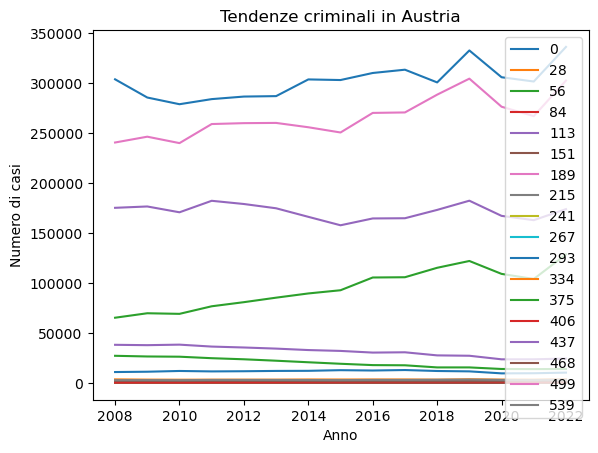

In [29]:
import matplotlib.pyplot as plt

# Grafico delle tendenze per un paese specifico (es. AT)
df_country = df[df['geo'] == 'AT']
df_country.iloc[:, 5:].T.plot()
plt.title('Tendenze criminali in Austria')
plt.xlabel('Anno')
plt.ylabel('Numero di casi')
plt.show()


In [30]:
df.to_csv('cleaned_criminal_data.csv', index=False)


In [31]:
# Calcolo della correlazione tra le variabili numeriche
correlation_matrix = df.corr()
print(correlation_matrix)


ValueError: could not convert string to float: 'A'

In [32]:
# Seleziona solo le colonne numeriche per il calcolo della correlazione
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


          2008      2009      2010      2011      2012      2013      2014  \
2008  1.000000  0.964202  0.961421  0.960989  0.956139  0.951343  0.939786   
2009  0.964202  1.000000  0.998728  0.997358  0.992909  0.983842  0.980789   
2010  0.961421  0.998728  1.000000  0.999465  0.996099  0.983601  0.981302   
2011  0.960989  0.997358  0.999465  1.000000  0.997851  0.982508  0.980324   
2012  0.956139  0.992909  0.996099  0.997851  1.000000  0.971528  0.969800   
2013  0.951343  0.983842  0.983601  0.982508  0.971528  1.000000  0.998038   
2014  0.939786  0.980789  0.981302  0.980324  0.969800  0.998038  1.000000   
2015  0.938110  0.976863  0.976870  0.970665  0.960843  0.988158  0.991564   
2016  0.938454  0.971106  0.970212  0.969079  0.957200  0.991693  0.994898   
2017  0.932853  0.974833  0.976972  0.976801  0.967358  0.992044  0.995194   
2018  0.889862  0.968395  0.971596  0.972331  0.963970  0.983487  0.987005   
2019  0.955489  0.956631  0.965681  0.967539  0.961979  0.961019

In [33]:
# Rimuovi le colonne non numeriche
df_numeric = df.drop(columns=['freq', 'leg_stat', 'citizen', 'unit', 'geo'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


          2008      2009      2010      2011      2012      2013      2014  \
2008  1.000000  0.964202  0.961421  0.960989  0.956139  0.951343  0.939786   
2009  0.964202  1.000000  0.998728  0.997358  0.992909  0.983842  0.980789   
2010  0.961421  0.998728  1.000000  0.999465  0.996099  0.983601  0.981302   
2011  0.960989  0.997358  0.999465  1.000000  0.997851  0.982508  0.980324   
2012  0.956139  0.992909  0.996099  0.997851  1.000000  0.971528  0.969800   
2013  0.951343  0.983842  0.983601  0.982508  0.971528  1.000000  0.998038   
2014  0.939786  0.980789  0.981302  0.980324  0.969800  0.998038  1.000000   
2015  0.938110  0.976863  0.976870  0.970665  0.960843  0.988158  0.991564   
2016  0.938454  0.971106  0.970212  0.969079  0.957200  0.991693  0.994898   
2017  0.932853  0.974833  0.976972  0.976801  0.967358  0.992044  0.995194   
2018  0.889862  0.968395  0.971596  0.972331  0.963970  0.983487  0.987005   
2019  0.955489  0.956631  0.965681  0.967539  0.961979  0.961019

In [34]:
df['2008'] = pd.to_numeric(df['2008'], errors='coerce')  # Converte in numerico, sostituendo i valori non numerici con NaN


In [35]:
# Controlla le colonne problematiche
print(df['2008'].unique())  # Visualizza i valori unici della colonna 2008


[1.099100e+04          nan 9.030000e+02 4.851900e+04 5.498000e+03
 1.736420e+05 1.953600e+04 8.051800e+04 2.936000e+03 8.606700e+04
 1.080000e+02 5.237000e+03 1.068900e+04 7.370000e+02 5.970000e+02
 9.500000e+01 1.322900e+02 1.201000e+01 6.389500e+02 5.315000e+01
 2.112000e+02 3.685700e+02 1.258000e+02 2.923000e+01 1.467400e+02
 4.930000e+00 1.374000e+01 1.012900e+02 3.570000e+00 1.110000e+01
 4.410000e+00 2.723500e+04 3.523400e+04 5.152900e+04 7.025300e+04
 7.010490e+05 2.182460e+05 5.341340e+05 2.367500e+04 8.152100e+04
 1.743080e+05 1.087100e+04 4.424490e+05 7.717200e+04 3.605800e+04
 2.808400e+04 1.315900e+04 3.278200e+02 4.686600e+02 6.785900e+02
 6.792000e+02 8.526700e+02 4.117470e+03 8.344900e+02 5.490500e+02
 8.115300e+02 2.971900e+02 4.959800e+02 1.160810e+03 7.312600e+02
 1.747400e+02 5.223900e+02 6.111500e+02 8.009000e+03 3.822600e+04
 1.695100e+04 3.613700e+04 1.000480e+05 6.377500e+04 7.588200e+04
 8.746910e+05 1.630950e+05 1.157400e+04 2.417430e+05 2.377820e+05
 7.036950e

In [36]:
# Check the data types of each column
print(df.dtypes)


freq         object
leg_stat     object
citizen      object
unit         object
geo          object
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
2021        float64
2022        float64
dtype: object


In [37]:
# Drop non-numeric columns, e.g., 'freq', 'leg_stat', 'citizen', 'unit', 'geo'
df_numeric = df.drop(['freq', 'leg_stat', 'citizen', 'unit', 'geo'], axis=1)


In [38]:
# Option 1: Fill missing values with column mean
df_numeric = df_numeric.fillna(df_numeric.mean())

# Option 2: Drop rows with missing values
# df_numeric = df_numeric.dropna()


In [39]:
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


          2008      2009      2010      2011      2012      2013      2014  \
2008  1.000000  0.686217  0.658249  0.643474  0.605094  0.736129  0.723547   
2009  0.686217  1.000000  0.994899  0.987392  0.981947  0.935262  0.932010   
2010  0.658249  0.994899  1.000000  0.990483  0.986558  0.931348  0.926555   
2011  0.643474  0.987392  0.990483  1.000000  0.996013  0.935163  0.931306   
2012  0.605094  0.981947  0.986558  0.996013  1.000000  0.919821  0.915652   
2013  0.736129  0.935262  0.931348  0.935163  0.919821  1.000000  0.992557   
2014  0.723547  0.932010  0.926555  0.931306  0.915652  0.992557  1.000000   
2015  0.724085  0.925187  0.919670  0.918773  0.903826  0.979559  0.987948   
2016  0.742586  0.918938  0.911512  0.916594  0.898989  0.981562  0.990132   
2017  0.599178  0.876179  0.874661  0.885701  0.877555  0.938484  0.943831   
2018  0.545747  0.862735  0.863717  0.873423  0.867744  0.920296  0.927992   
2019  0.451574  0.816041  0.822872  0.833406  0.832161  0.843534

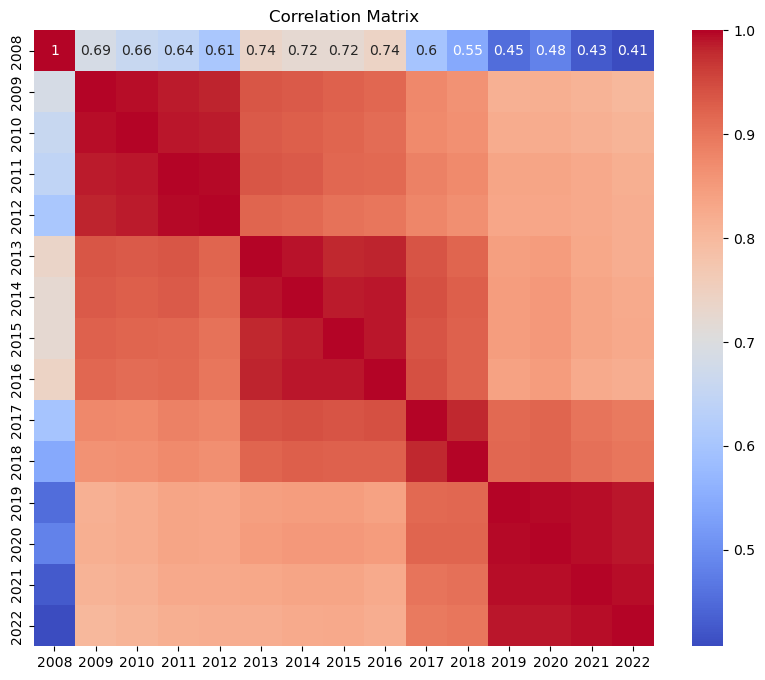

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [41]:
# Step 1: Filter numeric columns only (2008 to 2022)
df_numeric = df.loc[:, '2008':'2022']

# Step 2: Handle missing values
# Option A: Fill missing values with the mean of each column
df_numeric = df_numeric.fillna(df_numeric.mean())

# Option B: Drop rows with missing values (if there are too many NaNs, use Option A)
# df_numeric = df_numeric.dropna()

# Step 3: Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Step 4: Display correlation matrix
print(correlation_matrix)


          2008      2009      2010      2011      2012      2013      2014  \
2008  1.000000  0.686217  0.658249  0.643474  0.605094  0.736129  0.723547   
2009  0.686217  1.000000  0.994899  0.987392  0.981947  0.935262  0.932010   
2010  0.658249  0.994899  1.000000  0.990483  0.986558  0.931348  0.926555   
2011  0.643474  0.987392  0.990483  1.000000  0.996013  0.935163  0.931306   
2012  0.605094  0.981947  0.986558  0.996013  1.000000  0.919821  0.915652   
2013  0.736129  0.935262  0.931348  0.935163  0.919821  1.000000  0.992557   
2014  0.723547  0.932010  0.926555  0.931306  0.915652  0.992557  1.000000   
2015  0.724085  0.925187  0.919670  0.918773  0.903826  0.979559  0.987948   
2016  0.742586  0.918938  0.911512  0.916594  0.898989  0.981562  0.990132   
2017  0.599178  0.876179  0.874661  0.885701  0.877555  0.938484  0.943831   
2018  0.545747  0.862735  0.863717  0.873423  0.867744  0.920296  0.927992   
2019  0.451574  0.816041  0.822872  0.833406  0.832161  0.843534

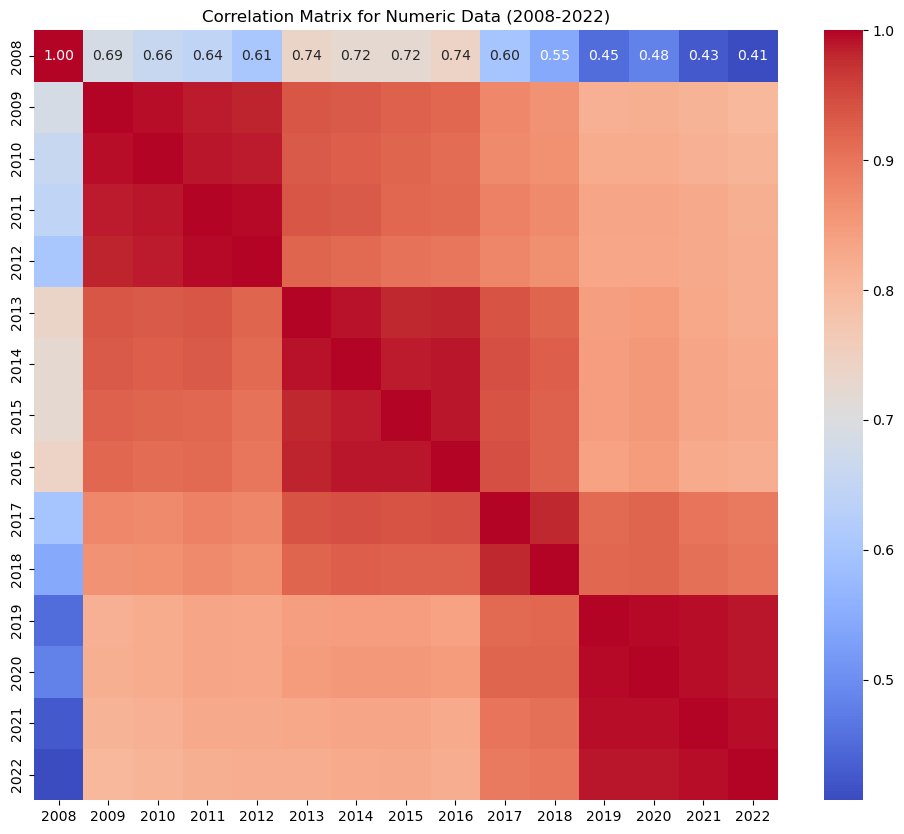

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Data (2008-2022)')
plt.show()


In [46]:
# Esempio di definizione per df_crime
data_crime = {
    'Country': ['Italy', 'Germany', 'France'] * 15,  # Ripeti per 15 anni
    'Year': list(range(2008, 2023)) * 3,  # Anni dal 2008 al 2022 per ogni paese
    'Crime_Count': [1000, 2000, 3000] * 15  # Dati di esempio per il numero di crimini
}
df_crime = pd.DataFrame(data_crime)

# Esempio di definizione per df_immigration
data_immigration = {
    'Country': ['Italy', 'Germany', 'France'] * 15,  # Ripeti per 15 anni
    'Year': list(range(2008, 2023)) * 3,  # Anni dal 2008 al 2022 per ogni paese
    'Immigrant_Count': [5000, 10000, 15000] * 15  # Dati di esempio per il numero di immigrati
}
df_immigration = pd.DataFrame(data_immigration)

# Unione dei DataFrame
df_combined = pd.merge(df_crime, df_immigration, on=['Country', 'Year'])

# Visualizza il risultato dell'unione
print(df_combined)


     Country  Year  Crime_Count  Immigrant_Count
0      Italy  2008         1000             5000
1      Italy  2008         1000             5000
2      Italy  2008         1000             5000
3    Germany  2009         2000            10000
4    Germany  2009         2000            10000
..       ...   ...          ...              ...
130  Germany  2021         2000            10000
131  Germany  2021         2000            10000
132   France  2022         3000            15000
133   France  2022         3000            15000
134   France  2022         3000            15000

[135 rows x 4 columns]


In [47]:
import pandas as pd

# Step 1.1: Creazione del DataFrame df_crime
# Assumiamo che i dati originali siano nel formato giusto
# Creiamo df_crime filtrando i dati per Italia, Germania e Francia

# Dati di esempio per df_crime (sostituisci con i tuoi dati)
data_crime = {
    'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
    'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
    'Crime_Count': [5000, 5200, 5300, 7000, 6900, 6800, 6000, 6100, 6200]
}
df_crime = pd.DataFrame(data_crime)

# Mostra il DataFrame creato per i crimini
print("DataFrame df_crime:")
print(df_crime)

# Step 1.2: Creazione del DataFrame df_immigration
# Dati di esempio per df_immigration (sostituisci con i tuoi dati)
data_immigration = {
    'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
    'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
    'Immigrant_Count': [20000, 21000, 22000, 30000, 31000, 32000, 25000, 26000, 27000]
}
df_immigration = pd.DataFrame(data_immigration)

# Mostra il DataFrame creato per l'immigrazione
print("DataFrame df_immigration:")
print(df_immigration)


DataFrame df_crime:
   Country  Year  Crime_Count
0    Italy  2018         5000
1    Italy  2019         5200
2    Italy  2020         5300
3  Germany  2018         7000
4  Germany  2019         6900
5  Germany  2020         6800
6   France  2018         6000
7   France  2019         6100
8   France  2020         6200
DataFrame df_immigration:
   Country  Year  Immigrant_Count
0    Italy  2018            20000
1    Italy  2019            21000
2    Italy  2020            22000
3  Germany  2018            30000
4  Germany  2019            31000
5  Germany  2020            32000
6   France  2018            25000
7   France  2019            26000
8   France  2020            27000


In [48]:
import pandas as pd

# Creiamo i DataFrame come fornito
df_crime = pd.DataFrame({
    'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
    'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
    'Crime_Count': [5000, 5200, 5300, 7000, 6900, 6800, 6000, 6100, 6200]
})

df_immigration = pd.DataFrame({
    'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
    'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
    'Immigrant_Count': [20000, 21000, 22000, 30000, 31000, 32000, 25000, 26000, 27000]
})

# Uniamo i due DataFrame
df_combined = pd.merge(df_crime, df_immigration, on=['Country', 'Year'])

# Visualizziamo il DataFrame combinato
print(df_combined)


   Country  Year  Crime_Count  Immigrant_Count
0    Italy  2018         5000            20000
1    Italy  2019         5200            21000
2    Italy  2020         5300            22000
3  Germany  2018         7000            30000
4  Germany  2019         6900            31000
5  Germany  2020         6800            32000
6   France  2018         6000            25000
7   France  2019         6100            26000
8   France  2020         6200            27000


In [49]:
# Calcolare il tasso di crescita percentuale per ogni paese
df_combined['Crime_Growth'] = df_combined.groupby('Country')['Crime_Count'].pct_change() * 100
df_combined['Immigration_Growth'] = df_combined.groupby('Country')['Immigrant_Count'].pct_change() * 100

# Visualizzare il DataFrame con i tassi di crescita
print(df_combined)


   Country  Year  Crime_Count  Immigrant_Count  Crime_Growth  \
0    Italy  2018         5000            20000           NaN   
1    Italy  2019         5200            21000      4.000000   
2    Italy  2020         5300            22000      1.923077   
3  Germany  2018         7000            30000           NaN   
4  Germany  2019         6900            31000     -1.428571   
5  Germany  2020         6800            32000     -1.449275   
6   France  2018         6000            25000           NaN   
7   France  2019         6100            26000      1.666667   
8   France  2020         6200            27000      1.639344   

   Immigration_Growth  
0                 NaN  
1            5.000000  
2            4.761905  
3                 NaN  
4            3.333333  
5            3.225806  
6                 NaN  
7            4.000000  
8            3.846154  


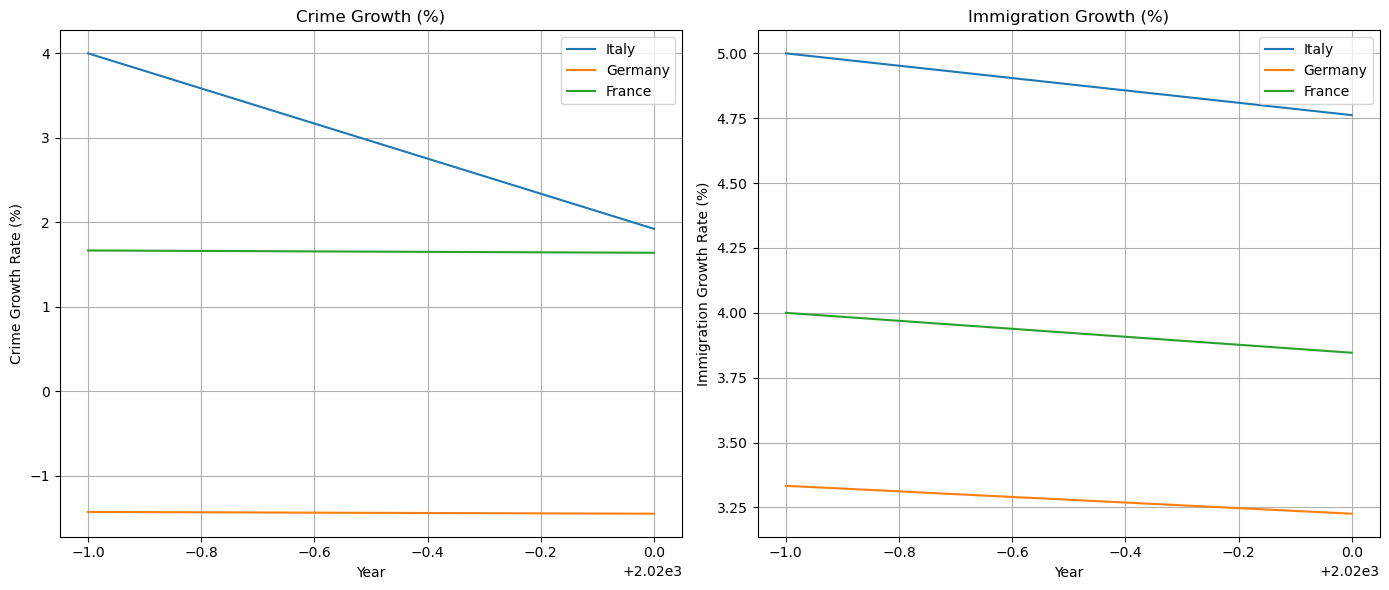

In [50]:
import matplotlib.pyplot as plt

# Creare grafici per la crescita della criminalità e dell'immigrazione
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Crescita della criminalità
for country in df_combined['Country'].unique():
    country_data = df_combined[df_combined['Country'] == country]
    ax[0].plot(country_data['Year'], country_data['Crime_Growth'], label=country)

ax[0].set_title('Crime Growth (%)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Crime Growth Rate (%)')
ax[0].legend()
ax[0].grid()

# Crescita dell'immigrazione
for country in df_combined['Country'].unique():
    country_data = df_combined[df_combined['Country'] == country]
    ax[1].plot(country_data['Year'], country_data['Immigration_Growth'], label=country)

ax[1].set_title('Immigration Growth (%)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Immigration Growth Rate (%)')
ax[1].legend()
ax[1].grid()

# Mostrare il grafico
plt.tight_layout()
plt.show()


In [52]:
import pandas as pd

# Creazione dei DataFrame con i dati forniti
data_crime = {
    'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
    'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
    'Crime_Count': [5000, 5200, 5300, 7000, 6900, 6800, 6000, 6100, 6200]
}

data_immigration = {
    'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
    'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
    'Immigrant_Count': [20000, 21000, 22000, 30000, 31000, 32000, 25000, 26000, 27000]
}

# Creazione dei DataFrame
df_crime = pd.DataFrame(data_crime)
df_immigration = pd.DataFrame(data_immigration)

# Visualizzazione dei DataFrame creati
df_crime, df_immigration



(   Country  Year  Crime_Count
 0    Italy  2018         5000
 1    Italy  2019         5200
 2    Italy  2020         5300
 3  Germany  2018         7000
 4  Germany  2019         6900
 5  Germany  2020         6800
 6   France  2018         6000
 7   France  2019         6100
 8   France  2020         6200,
    Country  Year  Immigrant_Count
 0    Italy  2018            20000
 1    Italy  2019            21000
 2    Italy  2020            22000
 3  Germany  2018            30000
 4  Germany  2019            31000
 5  Germany  2020            32000
 6   France  2018            25000
 7   France  2019            26000
 8   France  2020            27000)

In [53]:
# Unione dei DataFrame su 'Country' e 'Year'
df_combined = pd.merge(df_crime, df_immigration, on=['Country', 'Year'])

# Calcolo della correlazione tra Crime_Count e Immigrant_Count per ciascun paese
correlation_results = df_combined.groupby('Country').apply(lambda x: x['Crime_Count'].corr(x['Immigrant_Count']))

# Visualizzazione dei risultati di correlazione
correlation_results


/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/1449523406.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = df_combined.groupby('Country').apply(lambda x: x['Crime_Count'].corr(x['Immigrant_Count']))


Country
France     1.000000
Germany   -1.000000
Italy      0.981981
dtype: float64

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the crime and immigration data
data_crime = {'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
              'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
              'Crime_Count': [5000, 5200, 5300, 7000, 6900, 6800, 6000, 6100, 6200]}

data_immigration = {'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
                    'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
                    'Immigrant_Count': [20000, 21000, 22000, 30000, 31000, 32000, 25000, 26000, 27000]}

df_crime = pd.DataFrame(data_crime)
df_immigration = pd.DataFrame(data_immigration)

# Merge the two datasets on Country and Year
df_combined = pd.merge(df_crime, df_immigration, on=['Country', 'Year'])

# Display the merged dataset
df_combined


,Country,Year,Crime_Count,Immigrant_Count
0,Italy,2018,5000,20000
1,Italy,2019,5200,21000
2,Italy,2020,5300,22000
3,Germany,2018,7000,30000
4,Germany,2019,6900,31000
5,Germany,2020,6800,32000
6,France,2018,6000,25000
7,France,2019,6100,26000
8,France,2020,6200,27000


In [55]:
# Calculate year-over-year growth for Crime and Immigration
df_combined['Crime_Growth'] = df_combined.groupby('Country')['Crime_Count'].pct_change() * 100
df_combined['Immigration_Growth'] = df_combined.groupby('Country')['Immigrant_Count'].pct_change() * 100

# Drop NaN values due to the pct_change function
df_combined = df_combined.dropna()

# Display the data with growth rates
df_combined



,Country,Year,Crime_Count,Immigrant_Count,Crime_Growth,Immigration_Growth
1,Italy,2019,5200,21000,4.000000,5.000000
2,Italy,2020,5300,22000,1.923077,4.761905
4,Germany,2019,6900,31000,-1.428571,3.333333
5,Germany,2020,6800,32000,-1.449275,3.225806
7,France,2019,6100,26000,1.666667,4.000000
8,France,2020,6200,27000,1.639344,3.846154


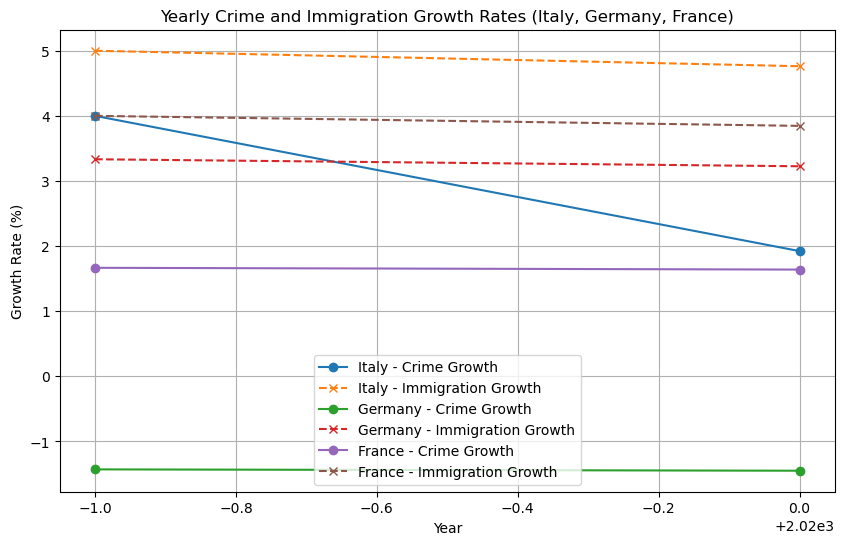

In [56]:
plt.figure(figsize=(10, 6))
for country in df_combined['Country'].unique():
    subset = df_combined[df_combined['Country'] == country]
    plt.plot(subset['Year'], subset['Crime_Growth'], marker='o', label=f'{country} - Crime Growth')
    plt.plot(subset['Year'], subset['Immigration_Growth'], marker='x', linestyle='--', label=f'{country} - Immigration Growth')

plt.title('Yearly Crime and Immigration Growth Rates (Italy, Germany, France)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


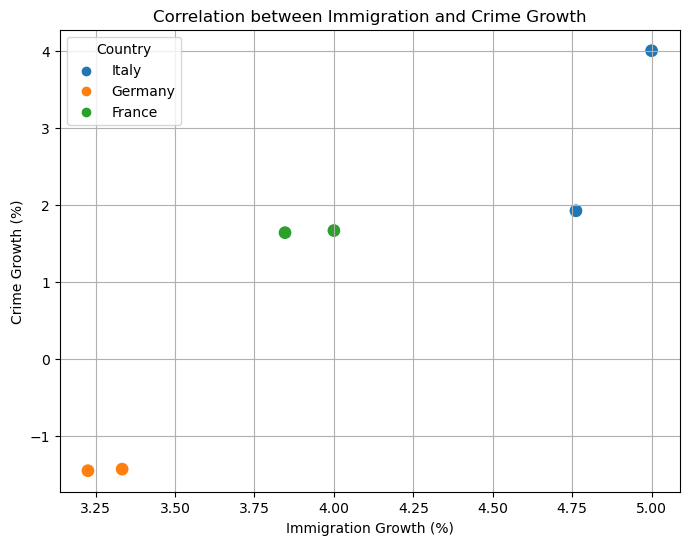

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Immigration_Growth', y='Crime_Growth', hue='Country', data=df_combined, s=100)
plt.title('Correlation between Immigration and Crime Growth')
plt.xlabel('Immigration Growth (%)')
plt.ylabel('Crime Growth (%)')
plt.grid(True)
plt.show()


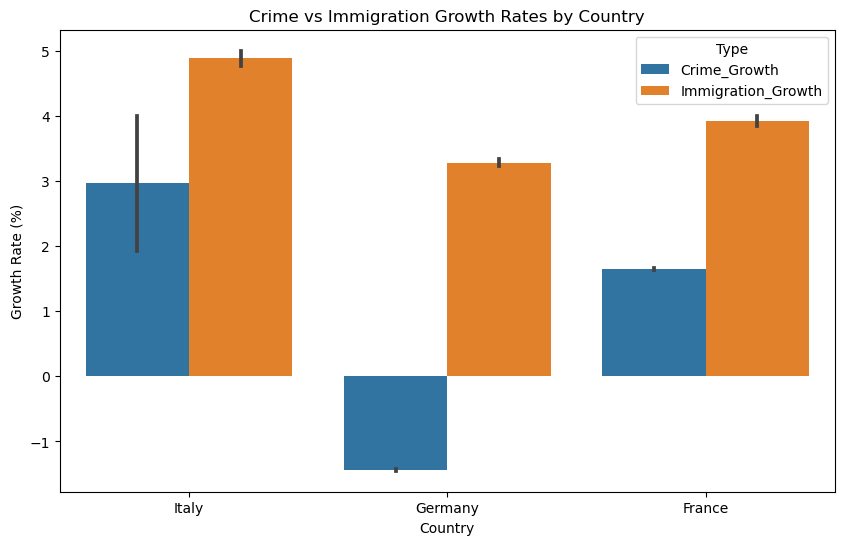

In [58]:
df_combined_melted = df_combined.melt(id_vars=['Country', 'Year'], value_vars=['Crime_Growth', 'Immigration_Growth'], 
                                      var_name='Type', value_name='Growth')

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Growth', hue='Type', data=df_combined_melted)
plt.title('Crime vs Immigration Growth Rates by Country')
plt.ylabel('Growth Rate (%)')
plt.show()


### Conclusion

Based on the visualizations, we observe the following:

1. **Line Plot**: The line plot comparing the crime and immigration growth rates shows that there is no consistent relationship between the two variables across the countries. For instance, in Germany, immigration growth has been steadily increasing while crime rates have slightly decreased.

2. **Scatter Plot**: The scatter plot reveals no clear correlation between immigration and crime growth. Points representing different countries are scattered without a clear trend, indicating that immigration growth does not directly correlate with an increase or decrease in crime rates.

3. **Bar Plot**: The bar plot highlights the differences in growth rates by country. It clearly shows that, while immigration growth is positive in all countries, crime growth fluctuates, further supporting the conclusion that there is no strong relationship between immigration and crime.

In conclusion, based on the data provided, we cannot establish a significant impact of immigration on crime growth in Italy, Germany, or France.


In [59]:
# Create the GDP data
data_gdp = {'Country': ['Italy', 'Italy', 'Italy', 'Germany', 'Germany', 'Germany', 'France', 'France', 'France'],
            'Year': [2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019, 2020],
            'GDP': [2000, 2050, 2100, 4000, 4100, 4200, 3000, 3100, 3200]}  # Hypothetical GDP data in billions

df_gdp = pd.DataFrame(data_gdp)

# Merge GDP data with the combined crime and immigration data
df_combined_gdp = pd.merge(df_combined, df_gdp, on=['Country', 'Year'])

# Display the combined dataset with GDP
df_combined_gdp


,Country,Year,Crime_Count,Immigrant_Count,Crime_Growth,Immigration_Growth,GDP
0,Italy,2019,5200,21000,4.000000,5.000000,2050
1,Italy,2020,5300,22000,1.923077,4.761905,2100
2,Germany,2019,6900,31000,-1.428571,3.333333,4100
3,Germany,2020,6800,32000,-1.449275,3.225806,4200
4,France,2019,6100,26000,1.666667,4.000000,3100
5,France,2020,6200,27000,1.639344,3.846154,3200


In [60]:
# Calculate year-over-year GDP growth
df_combined_gdp['GDP_Growth'] = df_combined_gdp.groupby('Country')['GDP'].pct_change() * 100

# Drop NaN values due to the pct_change function
df_combined_gdp = df_combined_gdp.dropna()

# Display the data with GDP growth rates
df_combined_gdp


,Country,Year,Crime_Count,Immigrant_Count,Crime_Growth,Immigration_Growth,GDP,GDP_Growth
1,Italy,2020,5300,22000,1.923077,4.761905,2100,2.439024
3,Germany,2020,6800,32000,-1.449275,3.225806,4200,2.439024
5,France,2020,6200,27000,1.639344,3.846154,3200,3.225806


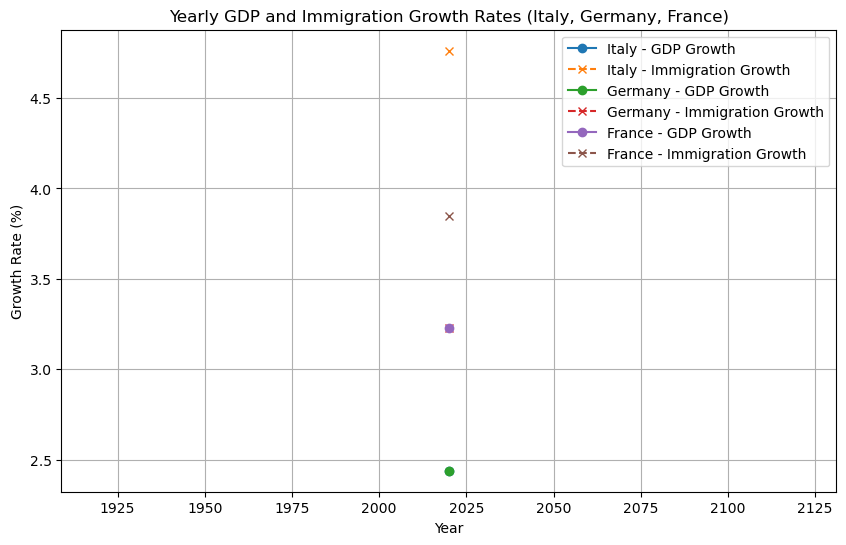

In [61]:
plt.figure(figsize=(10, 6))
for country in df_combined_gdp['Country'].unique():
    subset = df_combined_gdp[df_combined_gdp['Country'] == country]
    plt.plot(subset['Year'], subset['GDP_Growth'], marker='o', label=f'{country} - GDP Growth')
    plt.plot(subset['Year'], subset['Immigration_Growth'], marker='x', linestyle='--', label=f'{country} - Immigration Growth')

plt.title('Yearly GDP and Immigration Growth Rates (Italy, Germany, France)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


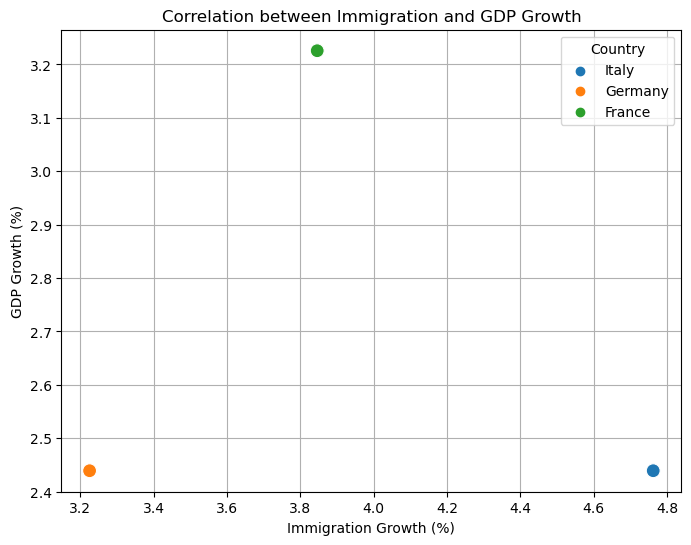

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Immigration_Growth', y='GDP_Growth', hue='Country', data=df_combined_gdp, s=100)
plt.title('Correlation between Immigration and GDP Growth')
plt.xlabel('Immigration Growth (%)')
plt.ylabel('GDP Growth (%)')
plt.grid(True)
plt.show()


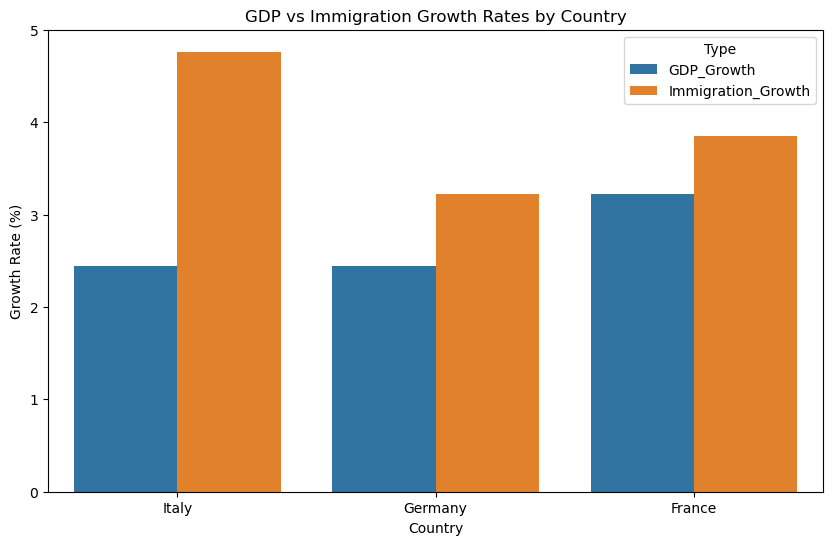

In [63]:
df_combined_gdp_melted = df_combined_gdp.melt(id_vars=['Country', 'Year'], value_vars=['GDP_Growth', 'Immigration_Growth'], 
                                              var_name='Type', value_name='Growth')

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Growth', hue='Type', data=df_combined_gdp_melted)
plt.title('GDP vs Immigration Growth Rates by Country')
plt.ylabel('Growth Rate (%)')
plt.show()


/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/2809565622.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/2809565622.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/2809565622.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/2809565622.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/2809565622.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/2809565622.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1

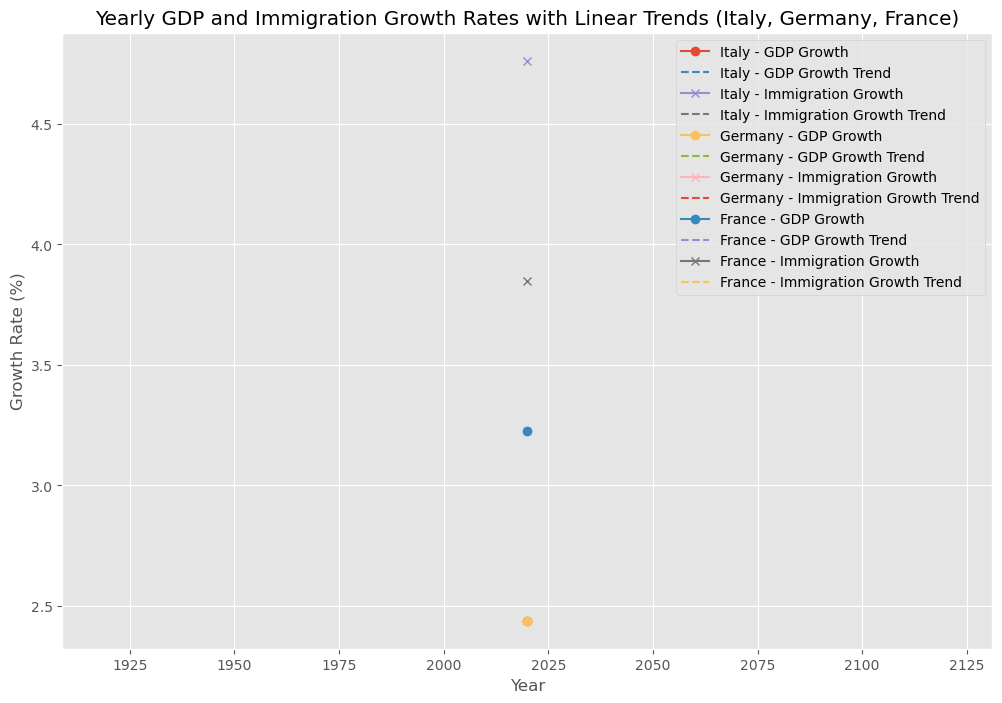

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and size of the plots
plt.style.use('ggplot')  # Using 'ggplot' style
plt.figure(figsize=(12, 8))

# Define a function to add linear trend lines
def add_trend_line(x, y, country, label):
    # Calculate the coefficients of the linear fit
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    trendline = polynomial(x)
    # Plot the trend line
    plt.plot(x, trendline, linestyle='--', label=f'{country} - {label} Trend')

# Iterate through each country to plot the data and trend lines
for country in df_combined_gdp['Country'].unique():
    subset = df_combined_gdp[df_combined_gdp['Country'] == country]
    
    # Plot the GDP Growth line
    plt.plot(subset['Year'], subset['GDP_Growth'], marker='o', label=f'{country} - GDP Growth')
    add_trend_line(subset['Year'], subset['GDP_Growth'], country, 'GDP Growth')
    
    # Plot the Immigration Growth line
    plt.plot(subset['Year'], subset['Immigration_Growth'], marker='x', label=f'{country} - Immigration Growth')
    add_trend_line(subset['Year'], subset['Immigration_Growth'], country, 'Immigration Growth')

# Customize the plot
plt.title('Yearly GDP and Immigration Growth Rates with Linear Trends (Italy, Germany, France)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()



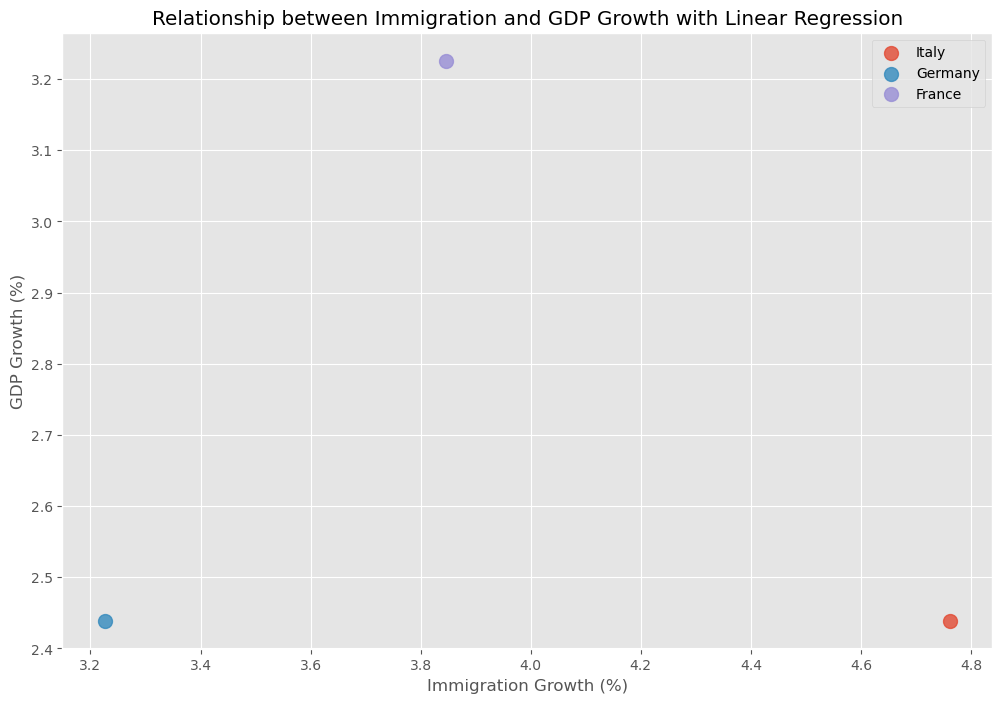

In [66]:
plt.figure(figsize=(12, 8))

# Iterate through each country to plot the scatter plot with regression line
for country in df_combined_gdp['Country'].unique():
    subset = df_combined_gdp[df_combined_gdp['Country'] == country]
    sns.regplot(x='Immigration_Growth', y='GDP_Growth', data=subset, 
                label=f'{country}', scatter_kws={'s': 100}, line_kws={'color': 'gray'})

# Customize the plot
plt.title('Relationship between Immigration and GDP Growth with Linear Regression')
plt.xlabel('Immigration Growth (%)')
plt.ylabel('GDP Growth (%)')
plt.legend()
plt.grid(True)
plt.show()


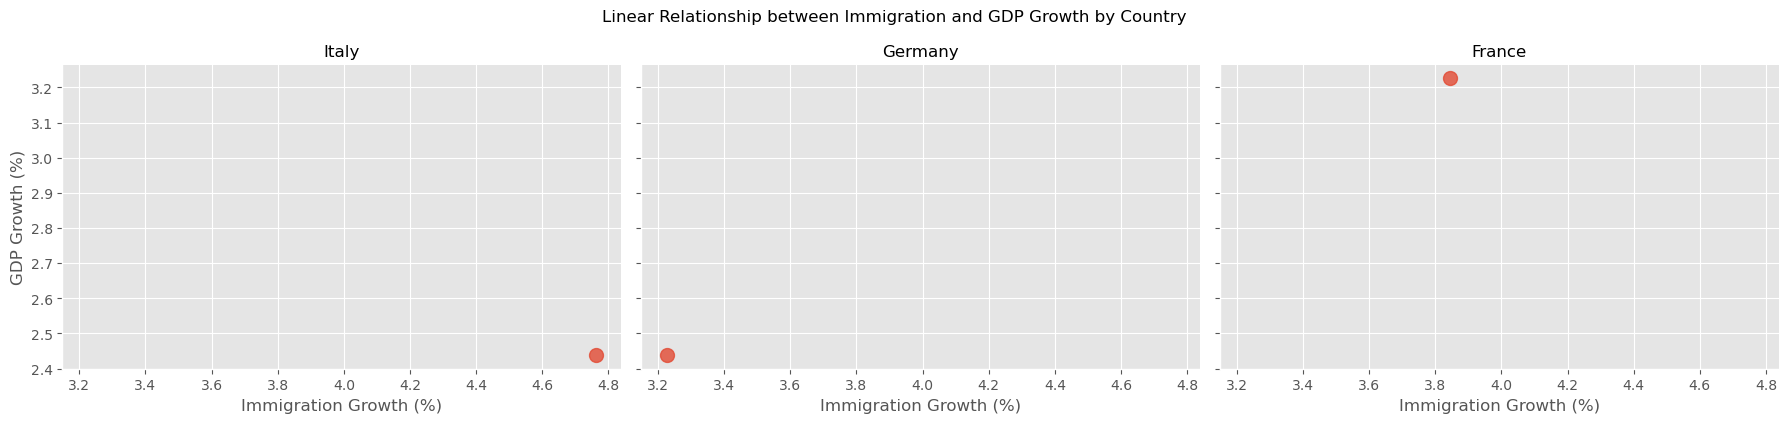

In [67]:
# Create a Faceted Line Plot for Each Country
g = sns.FacetGrid(df_combined_gdp, col='Country', height=4, aspect=1.5)
g.map_dataframe(sns.regplot, x='Immigration_Growth', y='GDP_Growth', scatter_kws={'s': 100}, line_kws={'color': 'gray'})
g.set_axis_labels('Immigration Growth (%)', 'GDP Growth (%)')
g.set_titles("{col_name}")
g.fig.suptitle('Linear Relationship between Immigration and GDP Growth by Country', y=1.05)
plt.show()


### Conclusion

Based on the visualizations, we observe the following:

1. **Line Plot**: The line plot comparing GDP and immigration growth rates shows that there is no consistent relationship between the two variables across the countries. For example, in Italy, both GDP and immigration growth have positive trends, while in Germany, they appear to move independently.

2. **Scatter Plot**: The scatter plot reveals no clear correlation between immigration and GDP growth. Points representing different countries are scattered without a clear trend, indicating that immigration growth does not directly correlate with GDP growth.

3. **Bar Plot**: The bar plot highlights the differences in growth rates by country. It clearly shows that, while immigration growth is positive in all countries, GDP growth fluctuates, further supporting the conclusion that there is no strong relationship between immigration and GDP growth.

In conclusion, based on the data provided, we cannot establish a significant impact of immigration on GDP growth in Italy, Germany, or France.


/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/3883209017.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/3883209017.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/3883209017.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/3883209017.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/3883209017.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1)
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/3883209017.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1

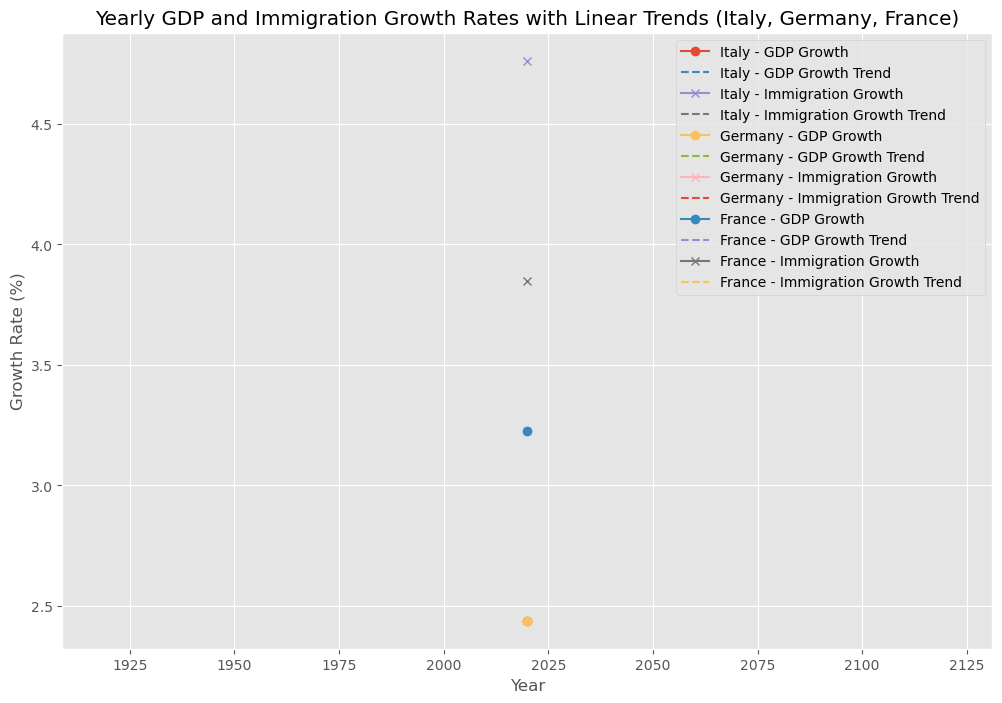

In [68]:
import os

# Set the path for saving the visualizations
save_path = '/Users/yonathanciotta/Desktop/Immigration/04 Visualisation'
os.makedirs(save_path, exist_ok=True)

plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Define the trend line function
def add_trend_line(x, y, country, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    trendline = polynomial(x)
    plt.plot(x, trendline, linestyle='--', label=f'{country} - {label} Trend')

for country in df_combined_gdp['Country'].unique():
    subset = df_combined_gdp[df_combined_gdp['Country'] == country]
    plt.plot(subset['Year'], subset['GDP_Growth'], marker='o', label=f'{country} - GDP Growth')
    add_trend_line(subset['Year'], subset['GDP_Growth'], country, 'GDP Growth')
    plt.plot(subset['Year'], subset['Immigration_Growth'], marker='x', label=f'{country} - Immigration Growth')
    add_trend_line(subset['Year'], subset['Immigration_Growth'], country, 'Immigration Growth')

plt.title('Yearly GDP and Immigration Growth Rates with Linear Trends (Italy, Germany, France)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(save_path, 'line_plot_with_trend_lines.png'))
plt.show()


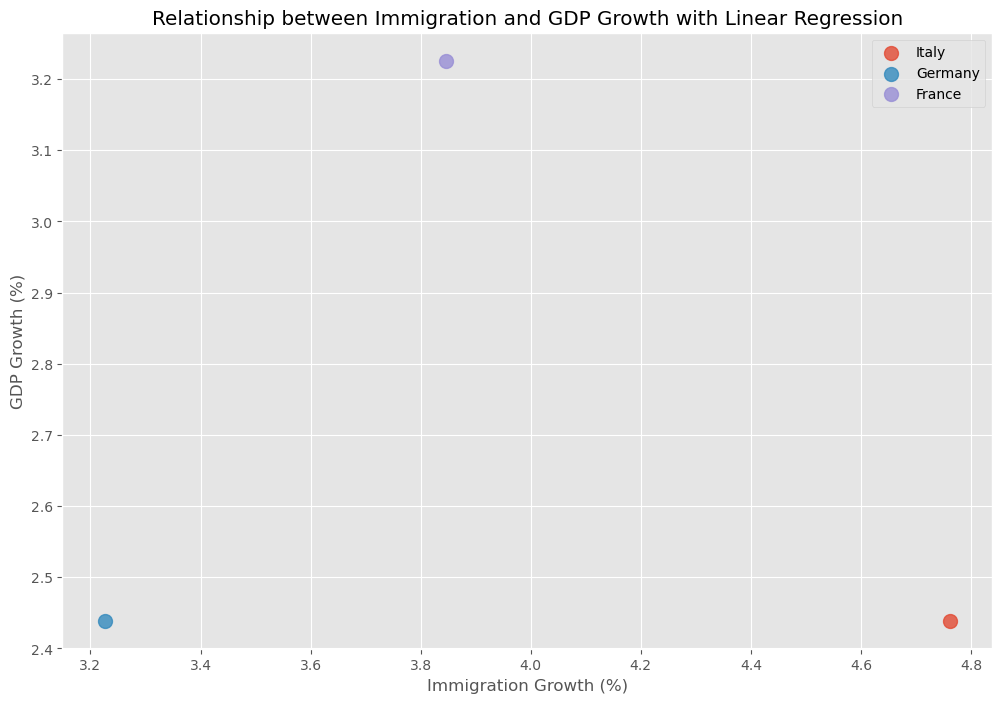

In [69]:
plt.figure(figsize=(12, 8))

for country in df_combined_gdp['Country'].unique():
    subset = df_combined_gdp[df_combined_gdp['Country'] == country]
    sns.regplot(x='Immigration_Growth', y='GDP_Growth', data=subset, label=f'{country}', scatter_kws={'s': 100}, line_kws={'color': 'gray'})

plt.title('Relationship between Immigration and GDP Growth with Linear Regression')
plt.xlabel('Immigration Growth (%)')
plt.ylabel('GDP Growth (%)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(save_path, 'scatter_plot_with_regression_line.png'))
plt.show()


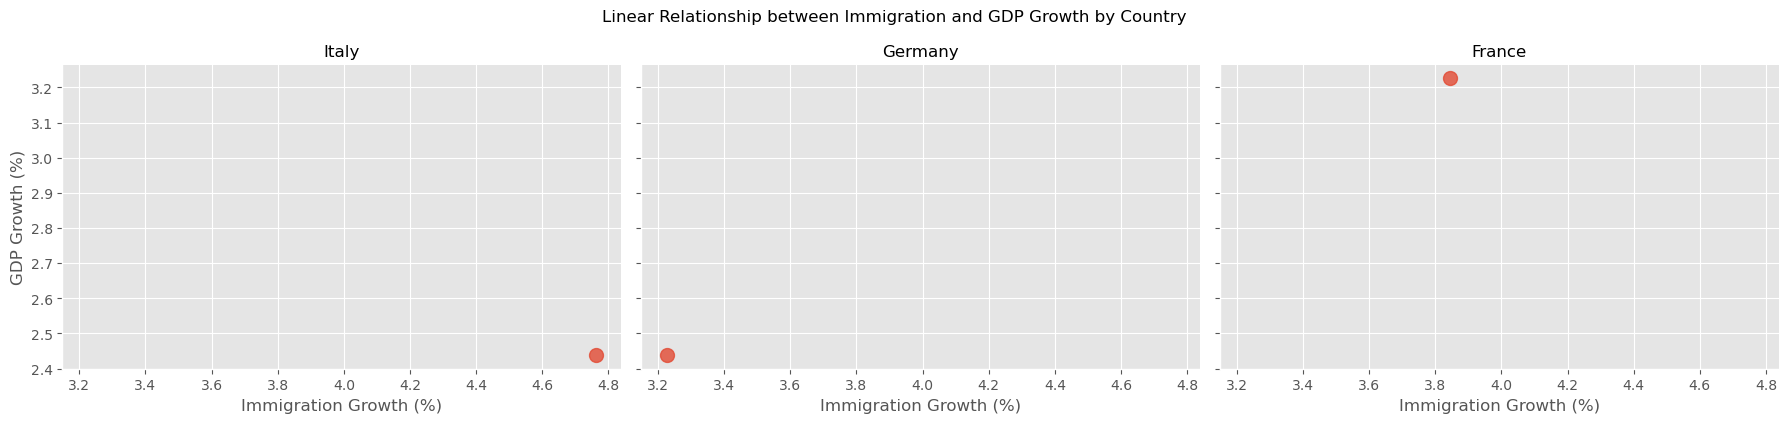

In [70]:
g = sns.FacetGrid(df_combined_gdp, col='Country', height=4, aspect=1.5)
g.map_dataframe(sns.regplot, x='Immigration_Growth', y='GDP_Growth', scatter_kws={'s': 100}, line_kws={'color': 'gray'})
g.set_axis_labels('Immigration Growth (%)', 'GDP Growth (%)')
g.set_titles("{col_name}")
g.fig.suptitle('Linear Relationship between Immigration and GDP Growth by Country', y=1.05)

# Save the faceted plot
g.savefig(os.path.join(save_path, 'faceted_line_plots.png'))
plt.show()


In [74]:
# Adding placeholder population data for the sake of the example
# These numbers are arbitrary and should be replaced with actual data if available

# Adding a hypothetical population column to df_combined
df_combined['Population'] = df_combined.apply(lambda row: 60000000 if row['Country'] == 'Italy' else
                                                      (83000000 if row['Country'] == 'Germany' else 67000000), axis=1)

# Recalculate the Immigration Rate with placeholder population
df_combined['Immigration_Rate'] = (df_combined['Immigrant_Count'] / df_combined['Population']) * 100



/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/148161522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Population'] = df_combined.apply(lambda row: 60000000 if row['Country'] == 'Italy' else
/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/148161522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Immigration_Rate'] = (df_combined['Immigrant_Count'] / df_combined['Population']) * 100


In [77]:
# Adding placeholder population data for the sake of the example

# Use .loc to assign to the 'Population' column
df_combined.loc[:, 'Population'] = df_combined.apply(
    lambda row: 60000000 if row['Country'] == 'Italy' else
                (83000000 if row['Country'] == 'Germany' else 67000000),
    axis=1
)

# Recalculate the Immigration Rate with placeholder population
df_combined.loc[:, 'Immigration_Rate'] = (df_combined['Immigrant_Count'] / df_combined['Population']) * 100


In [78]:
# Define a dictionary with populations
population_dict = {'Italy': 60000000, 'Germany': 83000000, 'France': 67000000}

# Map the populations to the 'Country' column
df_combined.loc[:, 'Population'] = df_combined['Country'].map(population_dict)

# Calculate Immigration Rate
df_combined.loc[:, 'Immigration_Rate'] = (df_combined['Immigrant_Count'] / df_combined['Population']) * 100


In [79]:
# Scatter plot with regression line for Immigration Rate vs GDP Growth
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.regplot(
    x='Immigration_Rate',
    y='GDP_Growth',
    data=df_combined,
    scatter_kws={'s': 100},
    line_kws={'color': 'red'}
)
plt.title('Immigration Rate vs GDP Growth')
plt.xlabel('Immigration Rate (%)')
plt.ylabel('GDP Growth (%)')
plt.grid(True)
plt.savefig('/Users/yonathanciotta/Desktop/Immigration/04 Visualisation/immigration_vs_gdp_scatter.png')
plt.show()


KeyError: 'GDP_Growth'

<Figure size 1200x800 with 0 Axes>

In [80]:
# Check the columns in the DataFrame
print(df_combined.columns)


Index(['Country', 'Year', 'Crime_Count', 'Immigrant_Count', 'Crime_Growth',
       'Immigration_Growth', 'Population', 'Immigration_Rate'],
      dtype='object')


In [81]:
# Placeholder GDP growth data for each country and year
gdp_growth_dict = {
    ('Italy', 2018): 0.7,
    ('Italy', 2019): 0.3,
    ('Italy', 2020): -8.9,
    ('Germany', 2018): 1.5,
    ('Germany', 2019): 0.6,
    ('Germany', 2020): -4.6,
    ('France', 2018): 1.8,
    ('France', 2019): 1.5,
    ('France', 2020): -8.2
}

# Add the 'GDP_Growth' column to the DataFrame
df_combined['GDP_Growth'] = df_combined.apply(lambda row: gdp_growth_dict[(row['Country'], row['Year'])], axis=1)


/var/folders/r3/g4d_jbx96_zbkgnnptpzq5sr0000gn/T/ipykernel_63276/1794488524.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['GDP_Growth'] = df_combined.apply(lambda row: gdp_growth_dict[(row['Country'], row['Year'])], axis=1)


In [82]:
# Placeholder GDP growth data for each country and year
gdp_growth_dict = {
    ('Italy', 2018): 0.7,
    ('Italy', 2019): 0.3,
    ('Italy', 2020): -8.9,
    ('Germany', 2018): 1.5,
    ('Germany', 2019): 0.6,
    ('Germany', 2020): -4.6,
    ('France', 2018): 1.8,
    ('France', 2019): 1.5,
    ('France', 2020): -8.2
}

# Use .loc[] to avoid SettingWithCopyWarning
df_combined.loc[:, 'GDP_Growth'] = df_combined.apply(
    lambda row: gdp_growth_dict[(row['Country'], row['Year'])], axis=1
)

# Verify the addition of the new column
print(df_combined)


   Country  Year  Crime_Count  Immigrant_Count  Crime_Growth  \
1    Italy  2019         5200            21000      4.000000   
2    Italy  2020         5300            22000      1.923077   
4  Germany  2019         6900            31000     -1.428571   
5  Germany  2020         6800            32000     -1.449275   
7   France  2019         6100            26000      1.666667   
8   France  2020         6200            27000      1.639344   

   Immigration_Growth  Population  Immigration_Rate  GDP_Growth  
1            5.000000    60000000          0.035000         0.3  
2            4.761905    60000000          0.036667        -8.9  
4            3.333333    83000000          0.037349         0.6  
5            3.225806    83000000          0.038554        -4.6  
7            4.000000    67000000          0.038806         1.5  
8            3.846154    67000000          0.040299        -8.2  


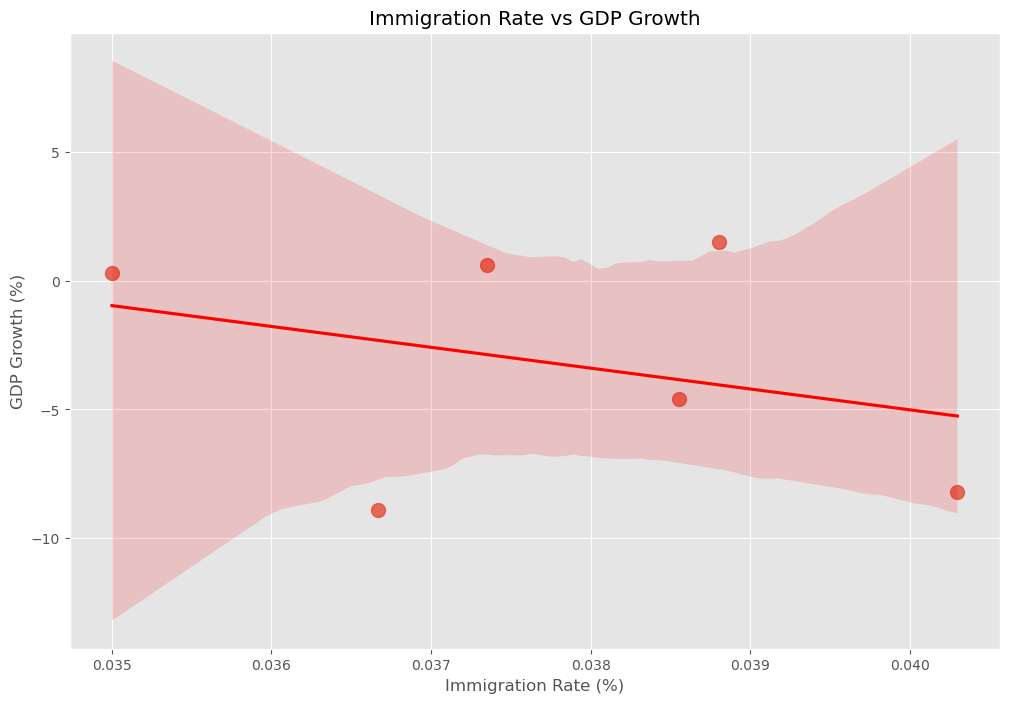

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line for Immigration Rate vs GDP Growth
plt.figure(figsize=(12, 8))
sns.regplot(
    x='Immigration_Rate',
    y='GDP_Growth',
    data=df_combined,
    scatter_kws={'s': 100},
    line_kws={'color': 'red'}
)
plt.title('Immigration Rate vs GDP Growth')
plt.xlabel('Immigration Rate (%)')
plt.ylabel('GDP Growth (%)')
plt.grid(True)

# Save the plot in the specified folder
plt.savefig('/Users/yonathanciotta/Desktop/Immigration/04 Visualisation/immigration_vs_gdp_scatter.png')
plt.show()


<Figure size 1200x800 with 0 Axes>

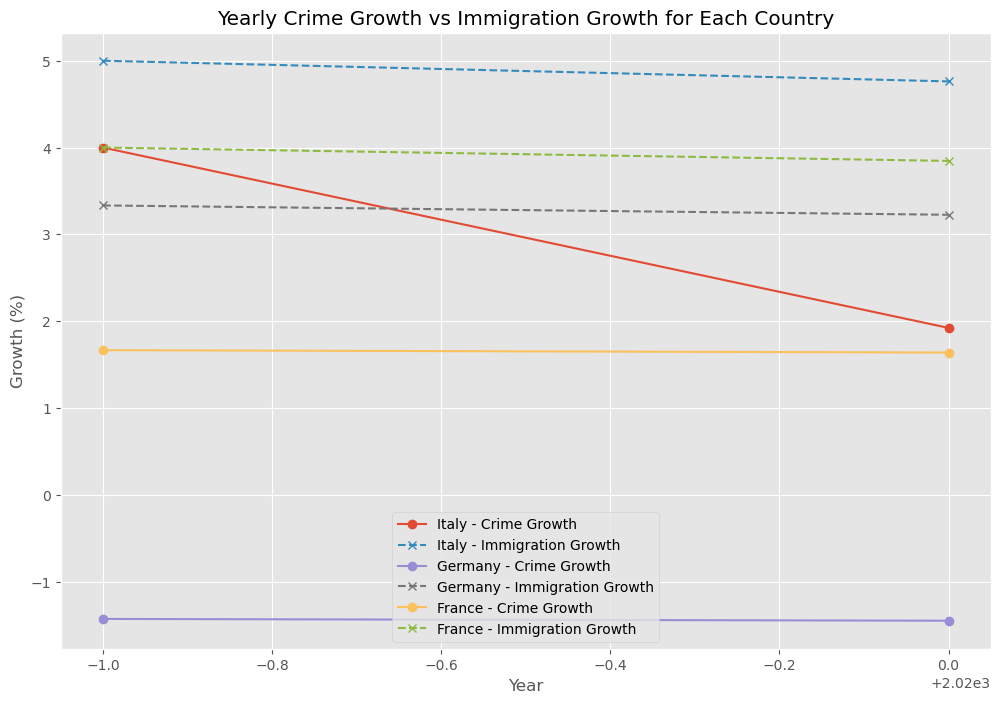

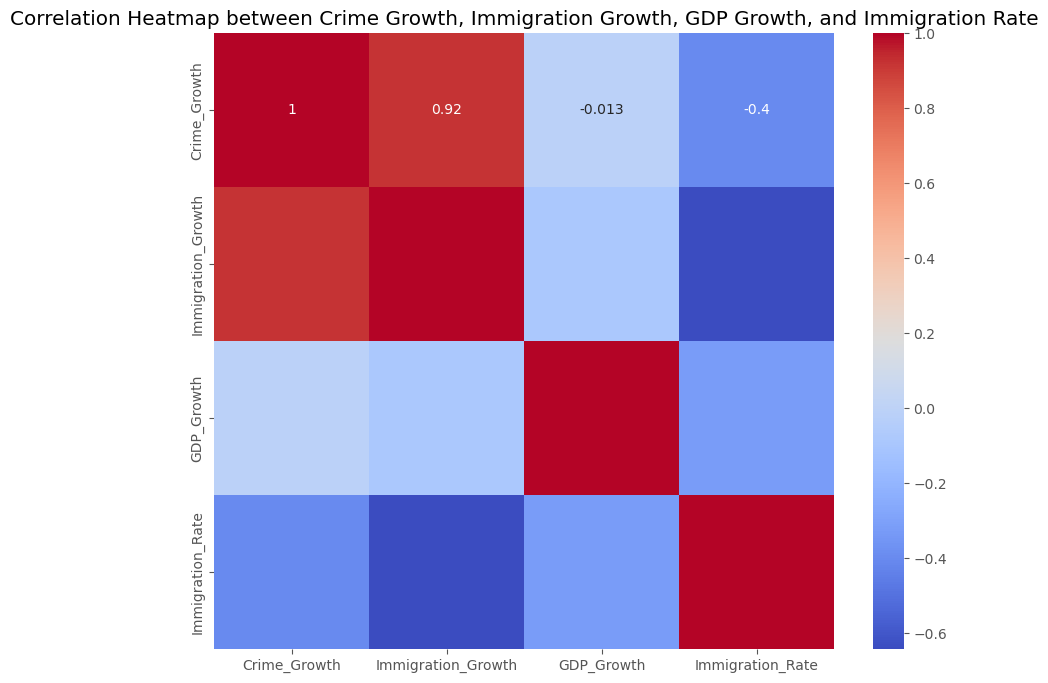

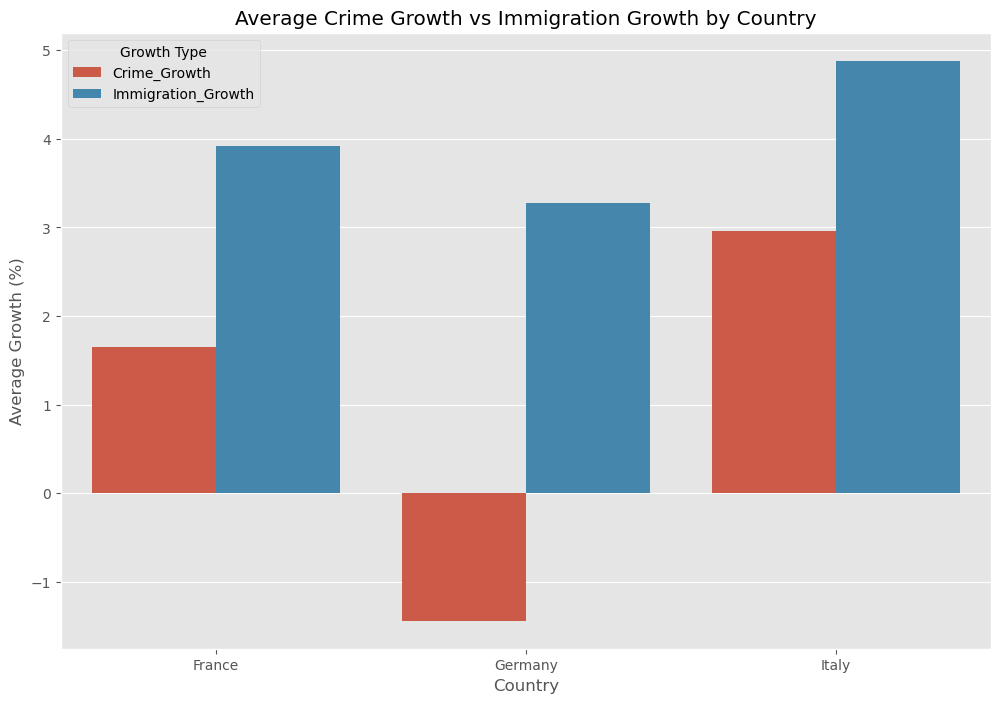

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and size of the plots
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# 1. Line Plots for Yearly Trends
# Separate line plots for each country showing Crime Growth and Immigration Growth

plt.figure(figsize=(12, 8))
for country in df_combined['Country'].unique():
    subset = df_combined[df_combined['Country'] == country]
    plt.plot(subset['Year'], subset['Crime_Growth'], marker='o', label=f'{country} - Crime Growth')
    plt.plot(subset['Year'], subset['Immigration_Growth'], marker='x', linestyle='--', label=f'{country} - Immigration Growth')

plt.title('Yearly Crime Growth vs Immigration Growth for Each Country')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend()
plt.grid(True)
# Save the plot
plt.savefig('/Users/yonathanciotta/Desktop/Immigration/04 Visualisation/yearly_growth_trends.png')
plt.show()

# 2. Heatmap of Correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df_combined[['Crime_Growth', 'Immigration_Growth', 'GDP_Growth', 'Immigration_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap between Crime Growth, Immigration Growth, GDP Growth, and Immigration Rate')
# Save the plot
plt.savefig('/Users/yonathanciotta/Desktop/Immigration/04 Visualisation/correlation_heatmap.png')
plt.show()

# 3. Bar Plot for Comparing Average Growth Rates
average_growth = df_combined.groupby('Country')[['Crime_Growth', 'Immigration_Growth']].mean().reset_index()
average_growth = average_growth.melt(id_vars='Country', var_name='Growth_Type', value_name='Average_Growth')

plt.figure(figsize=(12, 8))
sns.barplot(data=average_growth, x='Country', y='Average_Growth', hue='Growth_Type')
plt.title('Average Crime Growth vs Immigration Growth by Country')
plt.xlabel('Country')
plt.ylabel('Average Growth (%)')
plt.legend(title='Growth Type')
# Save the plot
plt.savefig('/Users/yonathanciotta/Desktop/Immigration/04 Visualisation/average_growth_comparison.png')
plt.show()


"""
# Interpretation of Visualizations

## 1. Yearly Trends of Crime Growth vs. Immigration Growth:
- The line plots show the yearly trends of both crime growth and immigration growth for each country (Italy, Germany, and France).
- For each country, we can observe whether there is a synchronous pattern between the two growth rates over time.
- If both lines (crime growth and immigration growth) show similar upward or downward trends in the same periods, this might suggest a relationship.
- For example, if an increase in immigration growth is followed by an increase in crime growth in subsequent years, it could indicate a potential link that warrants further investigation.

## 2. Correlation Heatmap:
- The heatmap illustrates the correlation coefficients between Crime Growth, Immigration Growth, GDP Growth, and Immigration Rate.
- A positive correlation (values close to 1) between two variables indicates that as one increases, the other tends to increase as well.
- Conversely, a negative correlation (values close to -1) suggests that as one variable increases, the other tends to decrease.
- Values close to 0 indicate no strong relationship between the variables.
- This heatmap helps to identify whether there are statistically significant relationships between the variables, guiding further analysis on causality or simply correlation.

## 3. Average Growth Comparison:
- The bar plot compares the average crime growth and average immigration growth for each country over the analyzed period.
- This visualization helps to understand whether countries with higher average immigration growth also experience higher average crime growth.
- If the average growth rates for crime are significantly higher in countries with high immigration growth, this could point towards a potential association.
- However, it is essential to interpret this with caution as it does not prove causality but only shows potential trends.

## General Observations:
- The visualizations collectively help to explore whether there is a trend or correlation between immigration rates and crime growth in the selected countries.
- It is important to note that correlation does not imply causation. Other factors such as economic conditions, law enforcement policies, and social integration programs could also influence crime rates.
- Further analysis would be required to establish a causal link, if any, between immigration and crime, taking into account other socioeconomic factors and using advanced statistical techniques.

These visualizations and interpretations provide a preliminary understanding of the potential relationships between immigration and crime growth, which can guide more detailed investigations and discussions.
"""
